# Week 15: Projects 

In [3]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#csv file
df_avatar = pd.read_csv('avatar.csv', engine='python', encoding='unicode_escape')
df_avatar.drop('Unnamed: 0', axis=1, inplace=True)
#droping scenes description
index_scene = df_avatar[df_avatar['character']=='Scene Description'].index.values
df_avatar.drop(index_scene, axis=0, inplace=True)

### Lines per top character

In [8]:
df_avatar_lines = df_avatar.groupby('character').count().sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.reset_index()['character'].values
df_avatar_lines[['character_words']]
df_avatar_lines

,id,book,book_num,chapter,chapter_num,full_text,character_words,writer,director,imdb_rating
character,,,,,,,,,,
Aang,1796,1796,1796,1796,1796,1796,1796,1796,1796,1766
Sokka,1639,1639,1639,1639,1639,1639,1639,1639,1639,1627
Katara,1437,1437,1437,1437,1437,1437,1437,1437,1437,1429
Zuko,776,776,776,776,776,776,776,776,776,766
Toph,507,507,507,507,507,507,507,507,507,507
Iroh,337,337,337,337,337,337,337,337,337,328
Azula,211,211,211,211,211,211,211,211,211,211
Jet,134,134,134,134,134,134,134,134,134,134
Suki,114,114,114,114,114,114,114,114,114,114


### Lines per character in each season / Top character per book

In [9]:
df_top_characters = df_avatar[df_avatar['character'].isin(top_character_names)]
df_top_characters = df_top_characters.groupby(['character', 'book']).count().sort_values(by=['character_words'], ascending=False).reset_index()
df_top_characters = df_top_characters[['character', 'book','character_words']]
df_top_characters

,character,book,character_words
0,Aang,Water,818
1,Katara,Water,636
2,Sokka,Water,614
3,Sokka,Fire,526
4,Sokka,Earth,499
5,Aang,Earth,492
6,Aang,Fire,486
7,Zuko,Fire,433
8,Katara,Earth,413
9,Katara,Fire,388


### Barplot

In [10]:
import plotly_express as px
import plotly.graph_objects as go

fig = px.bar(df_top_characters, x='character_words', y= 'character', orientation = 'h', 
             color=df_top_characters['book'], title='Top 10 Avatar Characters Number of Lines', 
             template = 'plotly_white',
             color_discrete_map={'Fire':'#C43A3A', 'Water':'#3A7FC4', 'Earth':'#BB653B'},)
fig.update_xaxes(title_text='Number of lines')
fig.update_yaxes(title_text='Characters')
fig.show()


# Wordclouds

In [11]:
df_water = df_avatar[df_avatar['book']=='Water']
df_earth = df_avatar[df_avatar['book']=='Earth']
df_fire = df_avatar[df_avatar['book']=='Fire']
#clean
water_text = ' '.join(df_water['character_words'].values).lower()
earth_text = ' '.join(df_earth['character_words'].values).lower()
fire_text = ' '.join(df_fire['character_words'].values).lower()

### Most repeater words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse

cv = CountVectorizer() # max_df=0.9
cv.fit(df_water['character_words'])
cv = CountVectorizer().fit(df_water['character_words'])
bag_of_words = cv.transform(df_water['character_words'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [13]:
# list(map(lambda x:x.lower(), list(top_character_names)))
character_names = [i.lower() for i in list(top_character_names)]
character_names = set(character_names)

### StyleCloud

In [14]:
import stylecloud
from wordcloud import STOPWORDS

my_custom_stopwords = character_names | STOPWORDS
#water -> fas fa-tint  ... #3A7FC4
#earth -> fas fa-globe-americas #BB653B #9A3F12
#fire -> fas fa-fire fas fa-fire-alt... #C43A3A
stylecloud.gen_stylecloud(earth_text, palette="cmocean.sequential.Matter_16", 
                          background_color="white", icon_name= 'fas fa-tint',
                          colors=['#3A7FC4', '#3A7FC4', '#3A7FC4'], stopwords=STOPWORDS,
                          custom_stopwords = my_custom_stopwords, collocations=False)

### WordCloud

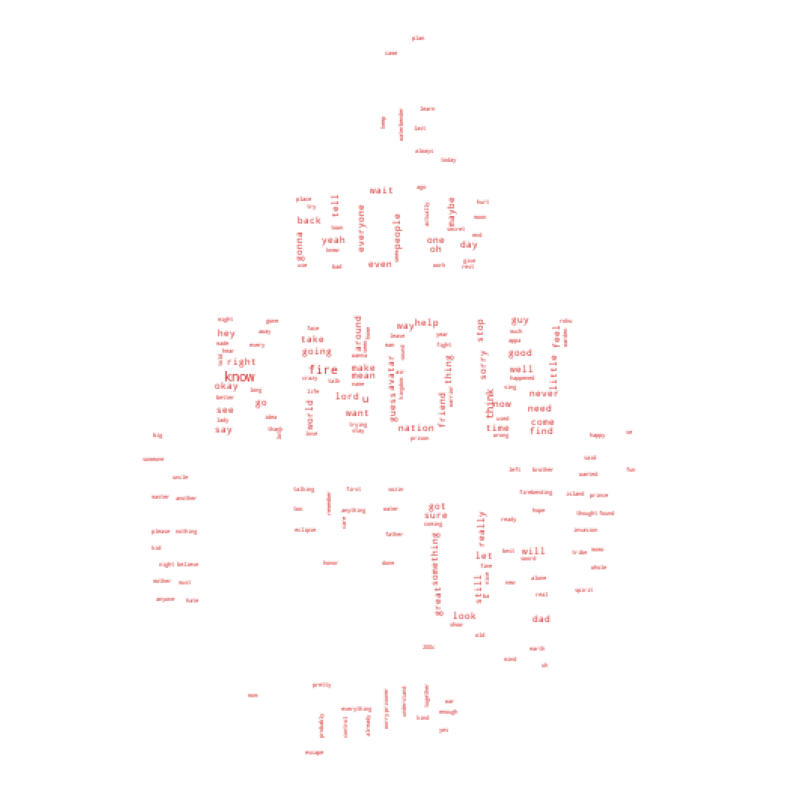

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
shape = np.array(Image.open('fire.png'))
wc = WordCloud(background_color = 'white', mask=shape, collocations=False, width=1600, height=800,
              stopwords=my_custom_stopwords)
wc.generate(fire_text)

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,70%%, %d%%)" % np.random.randint(49,50))

image_colors = ImageColorGenerator(shape)
wc.recolor(color_func=grey_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
# wc.to_file("fire.png")

### My cabbages!

In [16]:
#My Cabbages!
df_avatar[df_avatar['character_words'].str.contains('cabbages')]
#zuko's honor

,id,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
1001,1002,Water,1,The King of Omashu,5,Gate guard,[Angrily.] Rotten cabbages?! [Far off shot of ...,Rotten cabbages?! What kind of slum do you th...,John O'Bryan,Anthony Lioi,8.2
1003,1004,Water,1,The King of Omashu,5,Cabbage merchant,[Leaning over the rim of the path. Dramaticall...,No! My cabbages!,John O'Bryan,Anthony Lioi,8.2
1046,1047,Water,1,The King of Omashu,5,Cabbage merchant,[Grasping his head in despair.] My cabbages! [...,My cabbages! You're gonna pay for this!,John O'Bryan,Anthony Lioi,8.2
1048,1049,Water,1,The King of Omashu,5,Aang,[Sheepishly.] Two cabbages please.,Two cabbages please.,John O'Bryan,Anthony Lioi,8.2
1050,1051,Water,1,The King of Omashu,5,Guard,"Your majesty, these juveniles were arrested fo...","Your majesty, these juveniles were arrested fo...",John O'Bryan,Anthony Lioi,8.2
1203,1204,Water,1,The King of Omashu,5,Cabbage merchant,My cabbages!,My cabbages!,John O'Bryan,Anthony Lioi,8.2
1938,1939,Water,1,The Waterbending Scroll,9,Cabbage merchant,[Angry.] My cabbages! This place is worse than...,My cabbages! This place is worse than Omashu!,John O'Bryan,Anthony Lioi,8.0
7208,7209,Earth,2,The Serpent's Pass,12,Cabbage merchant,Ahhh! My cabbages! [He is carried away.],Ahhh! My cabbages!,"Joshua Hamilton, Michael Dante DiMartino",Ethan Spaulding,8.4
12679,12680,Fire,3,The Ember Island Players,17,Sokka,[Runs in front of him.] Just hear me out. [Pul...,Just hear me out. Here's something I think th...,"Tim Hedrick, Joshua Hamilton, John O'Bryan",Giancarlo Volpe,8.6


### Dialogue vs IMDB

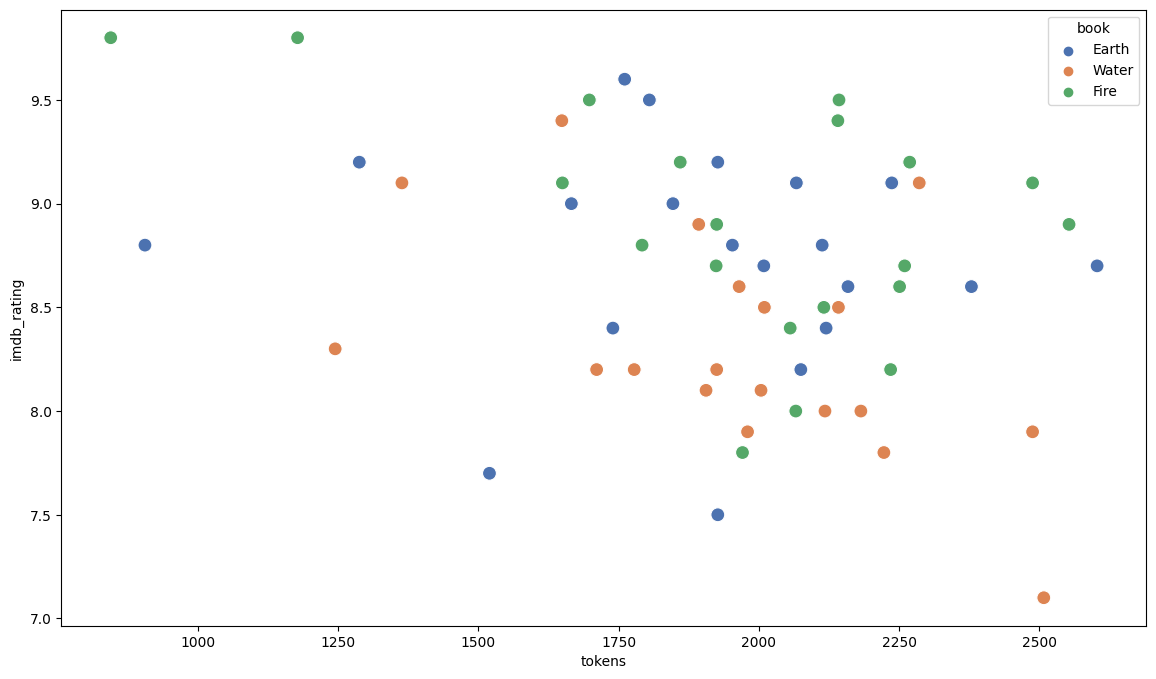

In [17]:
#preparing data
df_avatar['tokens'] = df_avatar['character_words'].apply(lambda x:len(x.split(' ')))

df_avatar['tokens']
df_scatter = pd.concat([df_avatar[['book', 'chapter', 'tokens']].groupby('chapter').sum(), 
           df_avatar[['book', 'chapter', 'imdb_rating']].drop_duplicates(['chapter']).set_index('chapter')],
         axis=1)

df_scatter.reset_index(inplace=True)
df_scatter.rename(columns={'index':'chapter'}, inplace=True)

#Static plot
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.scatterplot(x='tokens', y='imdb_rating', data=df_scatter, hue='book',
                    s=100, palette='deep')

# Dynamic/Interactive plot (Plotly)
# fig = px.scatter(df_scatter, x='tokens', y= 'imdb_rating', color='book', hover_name='chapter',
#                  title='IMDb Ratings vs Number of Spoken Words', template = 'plotly_white',
#                  color_discrete_map={'Fire':'#C43A3A', 'Water':'#3A7FC4', 'Earth':'#BB653B'},
#                 )
# fig.update_xaxes(title_text='Number of Spokens Words')
# fig.update_yaxes(title_text='IMDb Rating')
# fig.update_traces(marker=dict(size=12,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.update_layout(
#     font=dict(
#         size=13,
#     )
# )
# fig.show()
# py.plot(fig, filename = 'avatar_scatter', auto_open=True)

### Sentiment Analysis

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\516349\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# top_character_names
df_character_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]

sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)##

df_character_sentiment

,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


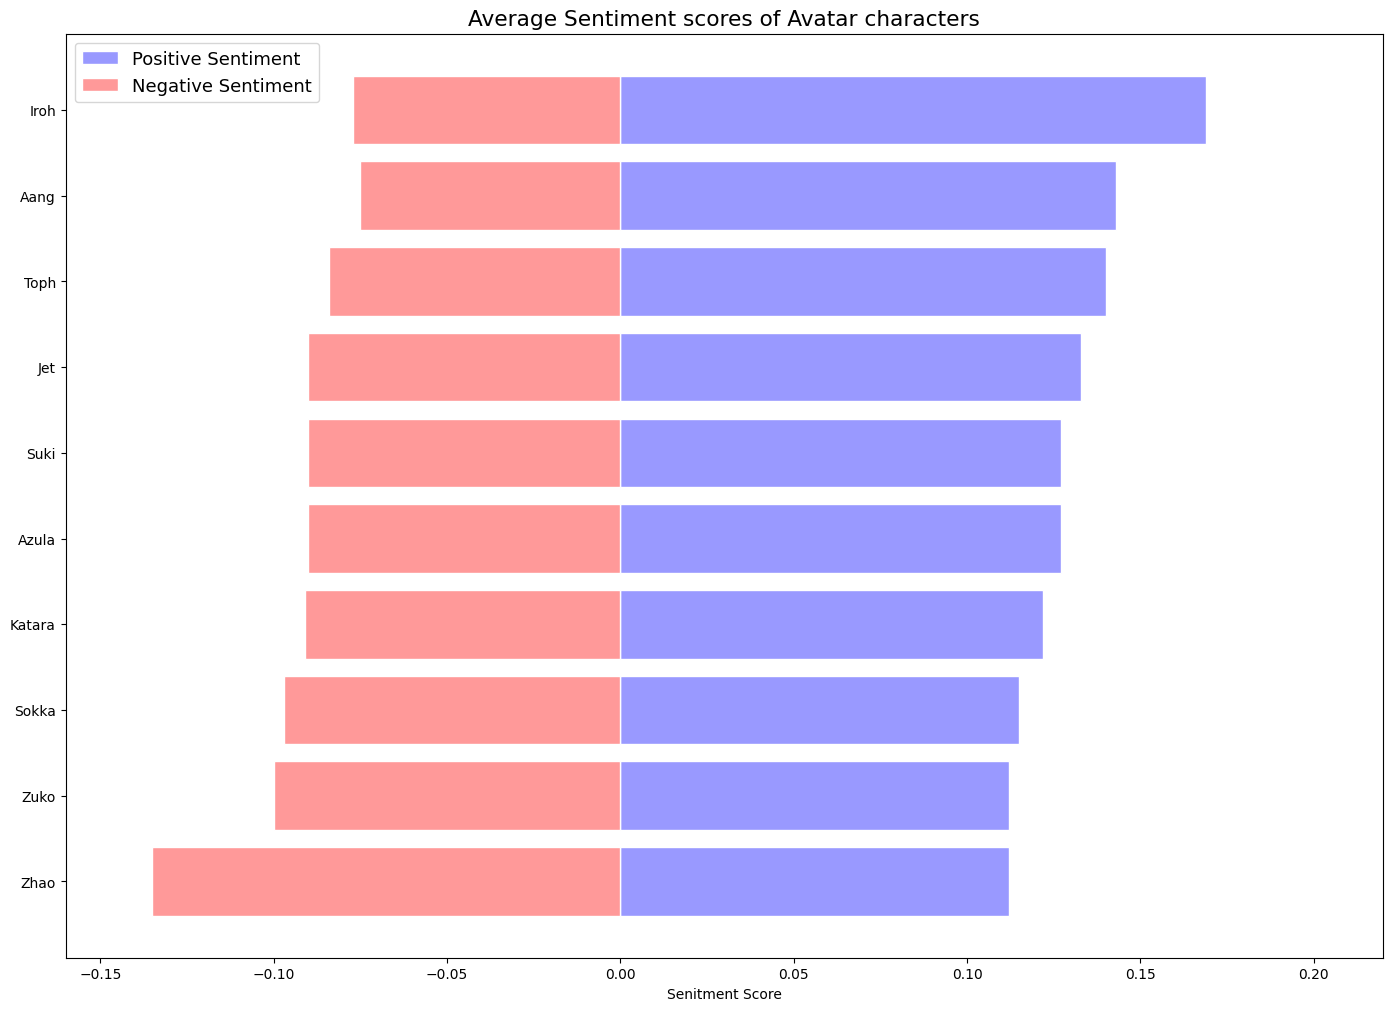

In [20]:
#data 
df_character_sentiment = df_character_sentiment.groupby('character').mean().round(3).sort_values('pos', ascending=True)

df_character_sentiment.reset_index(inplace=True)
n = len(df_character_sentiment['pos'])
X = np.arange(n)

#bar plot
fig = plt.figure(figsize = (17, 12))
plt.barh(X, df_character_sentiment['pos'], facecolor='#9999ff', edgecolor='white')
plt.barh(X, -df_character_sentiment['neg'], facecolor='#ff9999', edgecolor='white')

plt.rcParams.update({'font.size':13})
plt.xlim([-.16,.22])
plt.yticks(ticks=X, labels=df_character_sentiment['character'], rotation='0')

plt.xlabel('Senitment Score')
plt.title('Average Sentiment scores of Avatar characters')
plt.legend(('Positive Sentiment','Negative Sentiment'))
plt.grid(False)
plt.savefig('sentiment.png', bbox_inches='tight')
plt.show()

### Heatmap: Who speaks to whom? 

In [21]:
df_who_speaks = df_avatar.sort_values(['id'])
list_who_speaks = list(df_who_speaks['character'].values)
pair_characters = [list_who_speaks[i:i+2] for i in range(0,len(list_who_speaks),1)]

pair_characters.pop(-1)
pairs=[]
for i in pair_characters:
    pairs.append('-'.join(i))

In [22]:
count_elements = dict((i, pairs.count(i)) for i in set(pairs))

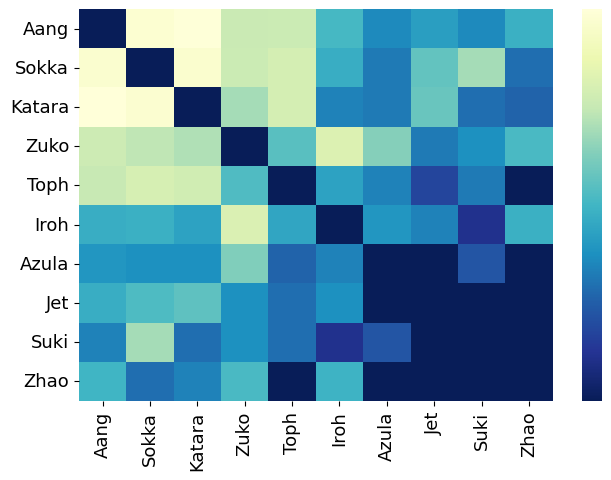

In [23]:
data_heatmap = sorted(count_elements.items(), key=lambda x:x[1], reverse=True)
data_heatmap = dict(data_heatmap)

x_list = [i.split('-')[0] for i in data_heatmap]
y_list = [i.split('-')[1] for i in data_heatmap]
z_list = [data_heatmap[i] for i in data_heatmap]

x_array = np.array(x_list)
y_array = np.array(y_list)
z_array = np.array(z_list)

df = pd.DataFrame.from_dict(np.array([x_array,y_array,z_array]).T)
df = df[df[0].isin(top_character_names)]
df = df[df[1].isin(top_character_names)]
df.columns = ['X_value','Y_value','Z_value']
df['Z_value'] = pd.to_numeric(df['Z_value'])

conditions = [df['X_value']==df['Y_value'],
              df['X_value']!=df['Y_value']]
values = [0, df['Z_value']]

df['Z_value'] = np.select(conditions, values)
####Scale
df['scale'] = np.log(df['Z_value']+1)
pivotted= df.pivot('Y_value','X_value','scale')

pivotted = pivotted[list(top_character_names[:15])]
pivotted = pivotted.reindex(list(top_character_names[:15]))
pivotted = pivotted.T #rows speak to columns
pivotted = pivotted.fillna(0)
pivotted

#Colors
#RdBu #YlGnBu #sns.cm.rocket

#HEATMAP
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax = sns.heatmap(pivotted,cmap='YlGnBu_r', cbar_kws={'ticks':[]})
ax.set_ylabel('')    
ax.set_xlabel('')
fig.tight_layout()
fig.savefig('heatmap.png')